# INF674 S5: Power Laws

## Céline Comte & Fabien Mathieu

## 2016 - 2017

If you want to deepen your theoretical knowledge of power laws, you can read (this is **not** mandatory):
- Chapter 7 from the book [Epidemics and Rumours in Complex Networks][massoulie].
- MEJ Newman, **Power laws, Pareto distributions and Zipf's law**. Contemporary Physics Vol. 46 , Iss. 5, 2005.

Other optional references are given in the course.

[massoulie]: http://www.lincs.fr/wp-content/uploads/2013/01/CUP_book_final.pdf "Epidemics and Rumours in Complex Networks by Moez Draief and Laurent Massoulié"

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Power Law and log normal distribution

A random variable $X$ has a lognormal distribution
if the random variable $Y = log(X)$ has a normal distribution.
The normal distribution with mean $\mu$ and standart deviation $\sigma$
is given by the density function
$$
f(y) = \frac1{\sqrt{2\pi} \sigma} e^{-(y - \mu)^2 / 2 \sigma^2},
\quad \forall y \in \mathbb{R}.
$$
The density function of the corresponding log-normal distribution is then
$$
g(x) = \frac1{\sqrt{2\pi} \sigma x} e^{-(\ln(x) - \mu)^2 / 2 \sigma^2},
\quad \forall x > 0.
$$

On a log-log plot, plot the probability density function of
a power law with parameters $\beta = 1/2, 1$ and $x_{min} = 1$
and a log-normal distribution with approximately the same slope.
What can you observe?

**Answer:**
For all $x > 0$, we have
$$
\ln(g(x))
= - \left( 1 - \frac\mu{\sigma^2} \right) \ln(x)
- \frac1{2 \sigma^2} (\ln(x))^2
- \left( \ln(\sqrt{2 \pi} \sigma) + \frac{\mu^2}{2 \sigma^2} \right).
$$
Approximately, the graph of this function has a slop
$- \left( 1 - \frac\mu{\sigma^2} \right)$.

Recall that the probability density function of a power law with parameters $\beta > 0$ and $x_{min} = 1$ is given by
$$
    f(x)
    = \frac\beta{x^{\beta + 1}},
    \quad \forall x > 1.
$$
This yields
$$
    \ln(f(x))
    = \ln(\beta) - (\beta + 1) \ln(x),
    \quad \forall x > 1,
$$
so that the slope is $\beta + 1$.

Hence, we can let $(\mu = \beta \sigma^2,\sigma)$ for any $\sigma > 0$ (the corresponding log-normal distribution then has a mean $e^{\mu + \sigma^2/2} = e^{(1/2 - \beta) \sigma^2}$).
We plot the curves for different values of $\sigma$.

# 2. Albert-Barabási Degree distribution

## Question 1

Write a function that gives, for given $\alpha$ and $n$, the vector of node degrees of an Albert-Barabási graph of $n$ nodes built from a graph seed $G(0)$ of two nodes linked together. *Advice*: drawing proportionnally to degree may be a computational bottleneck. Noticing that the degrees of such an AB graph of size $n$ sum to $2n-2$, can you build an array of size $2n-2$ such that picking a node proportionnally to its degree corresponds to picking up a random uniform element of the array?

**Answer:**
The trick is to log the start and end nodes of added edges in some growing (pre-allocated ;) ) array, so at any time any node is present in the array with multiplicity equal to its current degree. The code can be made faster the numpy way, but it is not necessary (to do... or not).

## Question 2

After choosing a value of $n$:
- such that the code above runs reasonably fast (less than a dozen seconds),
- as large as you can,

Study the degree distribution (CCDF and number of nodes having specified degrees) for a few values of $\alpha$ between $0$ and $1$. Compare the results to what you saw in course.

**Answer:**

## Question 3 (Bonus)

What can you say specifically for the case $\alpha = 1$ ?

**Answer:**
If you look at the formula from the course, you get $\frac{c_{i+1}}{c_i}=\frac 1 2$. In other words, you have a geometric distribution and the probability to have degree $i$ ($i\geq 1$) is $\frac{1}{2^i}$. You can see it by drawing the previous results on a semilog plot.

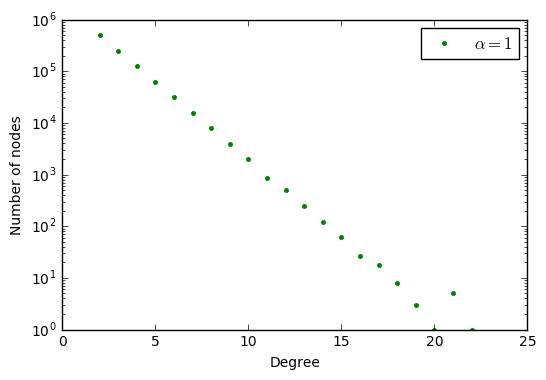

In [7]:
figure()
semilogy((arange(1, len(deg_dist3)+1)), deg_dist3, 'g.', label = "$\\alpha = 1$")
xlabel("Degree")
ylabel("Number of nodes")
legend(loc = 1, numpoints = 1)
show()

# 3. Power Laws on Datasets

When doing research, it is frequent to deal with some datasets. Sometimes, you will have to produce them yourself. This is not as easy as it seems and a full course would probably only scratch the surface of the required skills. Sometimes, others have done all the heavy lifting for you, and you just need to learn how to use existing datasets for your specific needs.

**File Format:** The datasets are provided with the following format:
- **_dataset_.ids** contains the actual names of the nodes (one per line, $ n $ lines in total). By convention, each node is associated to its line number (from $ 0 $ to $ n-1 $). Actual names may contain special characters (e.g. *ç*, *é*), so it is encoded with *utf-8*.
- **_dataset_.adja** contains the adjacency list of the graph: line $ i $ (from $ 0 $ to $ n-1 $) contains, in plain ASCII, the numbers of the nodes that are neighbors of $ i $. 

Datasets will be given on a USB key. This practical assumes they are stored in **../Datasets/** relatively to your working directory (adjust according to your own organization).

## DBLP

DBLP (*DataBase systems and Logic Programming* or *Digital Bibliography & Library Project*) is THE database that records CS publications. It records authors, conferences, journals... It is a good entry point to study a good example of undirected small-world: the co-authorship graph.

There are multiple versions of the DBLP graph available. For this practical, we will focus on the one available in http://konect.uni-koblenz.de/networks/dblp_coauthor

Let us begin with a simple example on how to compute the size of the Dataset.

In [8]:
import codecs
directory = "../Datasets/"
def get_size_from_dataset(prefix = "dblp"):
    n = 0
    m = 0
    with codecs.open(directory+prefix+".adja", "r", "utf-8") as f:
        for line in f:
            n += 1
            m += len([int(s) for s in line.split()])
    return n, m

Note: the use of **codecs** is to prepare you to using **.ids** files, which may have special characters.

## Question 1

What does the code above returns?

Give the number of nodes and edges of the DBLP dataset (warning, there may be a trap).

**Answer:**

## Question 2

Hum, this takes quite a while just to get such simple information. Let us try the following approach:

In [10]:
def get_size(prefix = "dblp"):
    try:
        return np.load(directory+prefix+"-size.npy")
    except IOError:
        np.save(directory+prefix+"-size", get_size_from_dataset(prefix))
        return get_size(prefix)

Test and explain the interest of using the **get_size** function (remark: you are **very strongly** encouraged to re-use this technique).

**Answer:**

## Question 3

Write a function that gives the degree distribution. For example, it may return an array *deg_dist* such that the number of nodes that have degree $i$ is *deg_dist[i-1]*. Display the degree distribution in a loglog scale. Also display the Complentary Cumulative Distribution Function of the degree. Comment the results in view of the previous parts of this practical.

**Answer:**

## Wikipedia

We now play with French and English crawls of Wikipedia made in 2013 and available on http://webgraph.di.unimi.it/. The graphs have been *cleaned*: only links from one article to another article are kept.

Two main differences with the DBLP database you just dealt with:
- The graphs are now *oriented*: a link from $i$ to $j$ does not mean there is a link from $j$ to $i$.
- The graphs are bigger. If you didn't optimize your code for DBLP, you probably will have to here. 

The French crawl is made of three files:
- **frwiki-2013.ids** contains the article titles (one per line, $ n $ lines in total). By convention, each article is associated to its line number (from $ 0 $ to $ n-1 $).
- **frwiki-2013.adja** contains the adjacency list of the graph: line $ i $ (from $ 0 $ to $ n-1 $) contains, in plain ASCII, the numbers of the articles that are linked by $ i $. 
- **frwiki-2013-t.adja** contains the adjacency list of the transposed graph: line $ i $ (from $ 0 $ to $ n-1 $) contains the numbers of the articles that have a link to $ i $.

The English crawl is provided in a similar way, with the prefix **enwiki-2013** instead of **frwiki-2013**. Note that it is roughly three times bigger than the French crawl. Feel free to use the dataset(s) you want.

The questions are essentially the same than for the DBLP dataset.

## Question 4

Give the number of nodes and edges of the dataset(s).

**Answer:**

## Question 5

Display in a loglog scale the degree distribution(s). Comment the results.

**Answer:**